In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 02 Feature Selection in scikit-learn

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer_df = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
cancer_df["class"] = cancer.target

In [8]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer_df.shape

(569, 31)

In [10]:
cancer_df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
221,13.560,13.90,88.59,561.3,0.1051,0.11920,0.07860,0.04451,0.1962,0.06303,0.2569,0.4981,2.011,21.03,0.005851,0.02314,0.02544,0.00836,0.01842,0.002918,14.98,17.13,101.10,686.6,0.1376,0.2698,0.25770,0.09090,0.3065,0.08177,1
139,11.280,13.39,73.00,384.8,0.1164,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.03498,0.02187,0.01965,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,1
408,17.990,20.66,117.80,991.7,0.1036,0.13040,0.12010,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.02509,0.01480,0.01414,0.003336,21.08,25.41,138.10,1349.0,0.1482,0.3735,0.33010,0.19740,0.3060,0.08503,0
110,9.777,16.99,62.50,290.2,0.1037,0.08404,0.04334,0.01778,0.1584,0.07065,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.02722,0.01023,0.03281,0.004638,11.05,21.47,71.68,367.0,0.1467,0.1765,0.13000,0.05334,0.2533,0.08468,1
496,12.650,18.17,82.69,485.6,0.1076,0.13340,0.08017,0.05074,0.1641,0.06854,0.2324,0.6332,1.696,18.40,0.005704,0.02502,0.02636,0.01032,0.01759,0.003563,14.38,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330,1


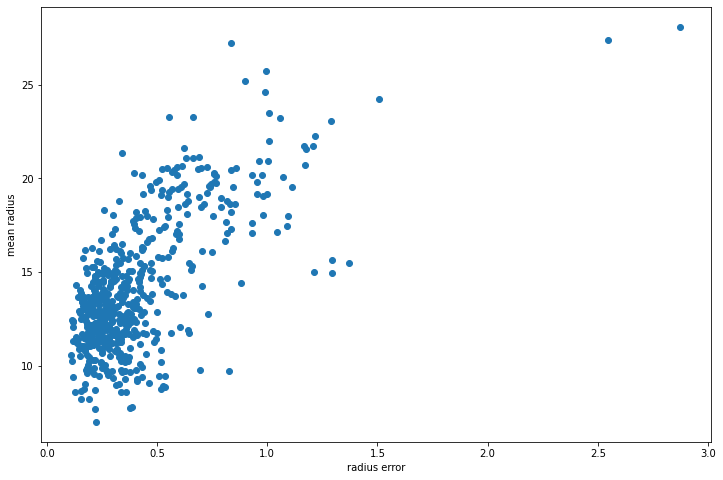

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(cancer_df["radius error"], cancer_df["mean radius"])

plt.xlabel("radius error")
plt.ylabel("mean radius")

plt.show()

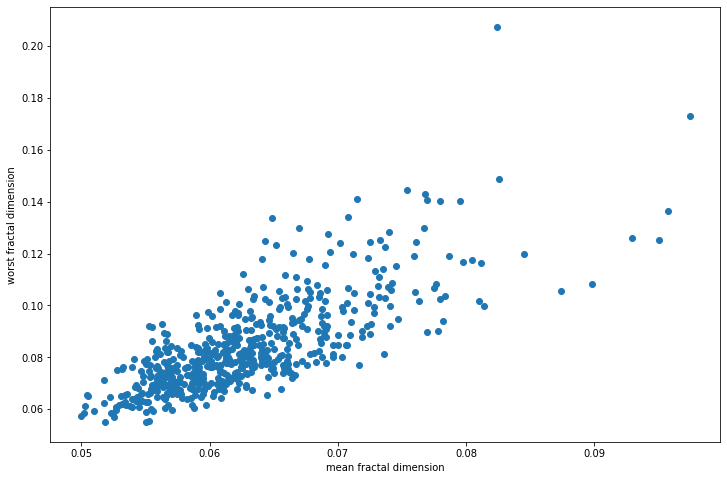

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(cancer_df["mean fractal dimension"], cancer_df["worst fractal dimension"])

plt.xlabel("mean fractal dimension")
plt.ylabel("worst fractal dimension")

plt.show()

In [13]:
cancer_df_subset = cancer_df[
                             [
                              'mean radius', 
                              'mean texture', 
                              'mean perimeter', 
                              'mean area',
                              'radius error', 
                              'texture error',
                              'worst perimeter', 
                              'worst area',
                              'class'
                             ]
]

In [14]:
cancer_corr = cancer_df_subset.corr()

cancer_corr

,mean radius,mean texture,mean perimeter,mean area,radius error,texture error,worst perimeter,worst area,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.679090,-0.097317,0.965137,0.941082,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.275869,0.386358,0.358040,0.343546,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.691765,-0.086761,0.970387,0.941550,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.732562,-0.066280,0.959120,0.959213,-0.708984
radius error,0.679090,0.275869,0.691765,0.732562,1.000000,0.213247,0.719684,0.751548,-0.567134
texture error,-0.097317,0.386358,-0.086761,-0.066280,0.213247,1.000000,-0.102242,-0.083195,0.008303
worst perimeter,0.965137,0.358040,0.970387,0.959120,0.719684,-0.102242,1.000000,0.977578,-0.782914
worst area,0.941082,0.343546,0.941550,0.959213,0.751548,-0.083195,0.977578,1.000000,-0.733825
class,-0.730029,-0.415185,-0.742636,-0.708984,-0.567134,0.008303,-0.782914,-0.733825,1.000000


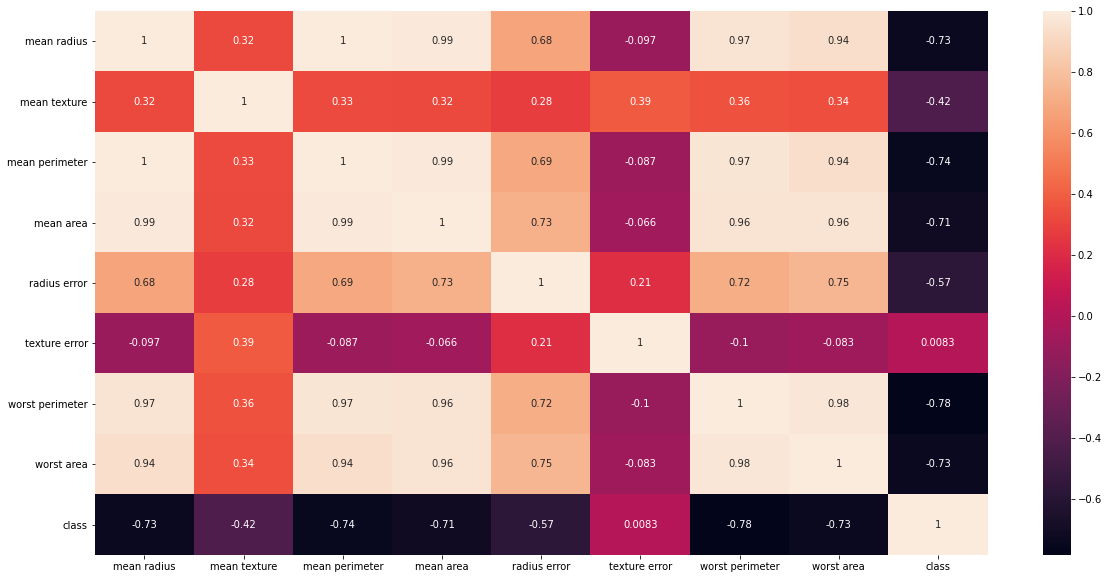

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(cancer_corr, annot=True)

plt.show()

## Performing Classification with all Features

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = cancer_df.drop('class', axis=1)
y = cancer_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
print("Train X shape: {}".format(X_train.shape))
print("Train y shape: {}".format(y_train.shape))

print("Test X shape: {}".format(X_test.shape))
print("Test y shape: {}".format(y_test.shape))

Train X shape: (455, 30)
Train y shape: (455,)
Test X shape: (114, 30)
Test y shape: (114,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [26]:
classifier = LogisticRegression(solver='liblinear')

In [27]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
pred_results = pd.DataFrame(
    {
        'y_test': y_test,
        'y_pred': y_pred     
    }
)

In [30]:
pred_results.head()

,y_test,y_pred
254,0,0
498,0,0
510,1,1
509,0,0
419,1,1


<center>
<img src="https://raw.githubusercontent.com/xpython21/Colab/main/Images/confusion_matrix.png?v23-05-2021">
</center>

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/confusion_matrix.png)


In [51]:
cancer_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
cancer_crosstab

y_pred,0,1
y_test,,
0,45,2
1,1,66


In [50]:
confusion_matrix(y_test, y_pred)

array([[45,  2],
       [ 1, 66]])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# this score is the ratio of correctly predicted observations to the total number of observations
# Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("accuracy_score: ", acc)
# this score tells us that when the model predicted that a tumor was malignant, it was right 97% of the time
#Precision = TP/TP+FP
print("precision score: ", prec)
# this score tells us that of all the malignant instances in our dataset, our module was able to correctly identify 98.5% of them
# Recall = TP/(TP+FN)
print("recall score: ", recall)

accuracy_score:  0.9736842105263158
precision score:  0.9705882352941176
recall score:  0.9850746268656716


## Exploring the Regression Dataset

In [67]:
import datetime

In [58]:
housesale_df = pd.read_csv("https://raw.githubusercontent.com/xpython21/Colab/main/Data/ReDim/kc_house_data.csv")

In [56]:
housesale_df.shape

(21597, 21)

In [57]:
housesale_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [60]:
housesale_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [61]:
housesale_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [62]:
housesale_df = housesale_df.drop(['id', 'date', 'zipcode'], axis=1)

In [63]:
housesale_df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062


In [68]:
housesale_df['age'] = datetime.datetime.now().year - housesale_df['yr_built']

In [70]:
housesale_df.drop('yr_built', axis=1, inplace=True)
housesale_df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,70
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,88


In [71]:
housesale_df['renovated'] = housesale_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
housesale_df.drop('yr_renovated', axis=1, inplace=True)
housesale_df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,66,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,70,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,88,0


In [74]:
housesale_df['renovated'] = housesale_df['renovated'].astype('category')

In [75]:
housesale_df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
age                 int64
renovated        category
dtype: object

In [76]:
housesale_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,50.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,46.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


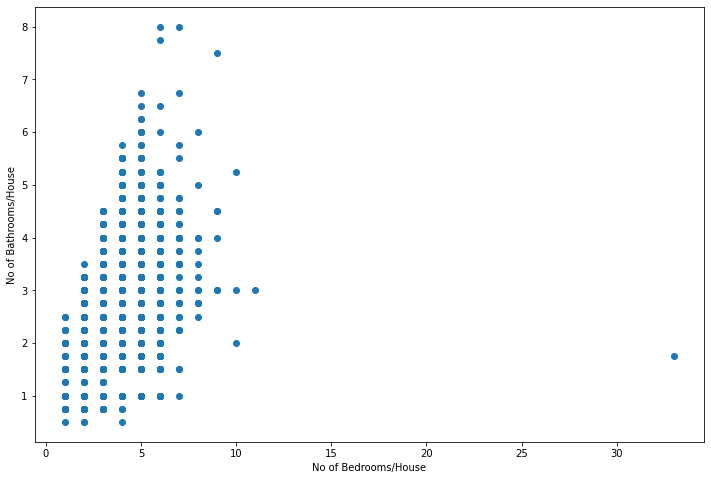

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x='bedrooms', y='bathrooms', data=housesale_df)

plt.xlabel('No of Bedrooms/House')
plt.ylabel('No of Bathrooms/House')

plt.show()

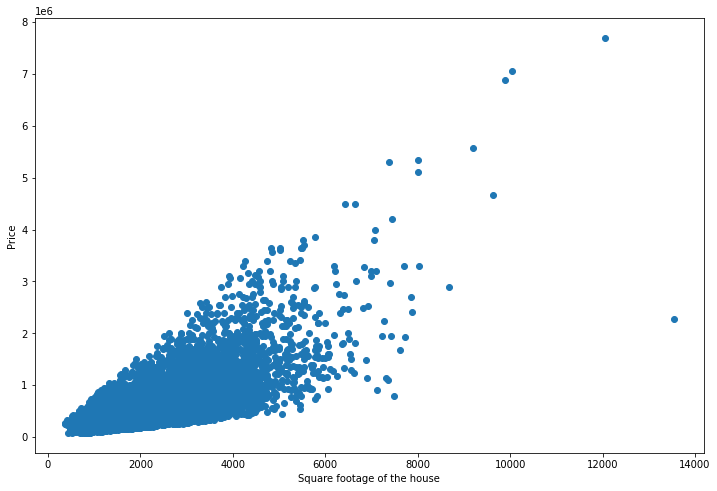

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x='sqft_living', y='price', data=housesale_df)

plt.xlabel('Square footage of the house')
plt.ylabel('Price')

plt.show()

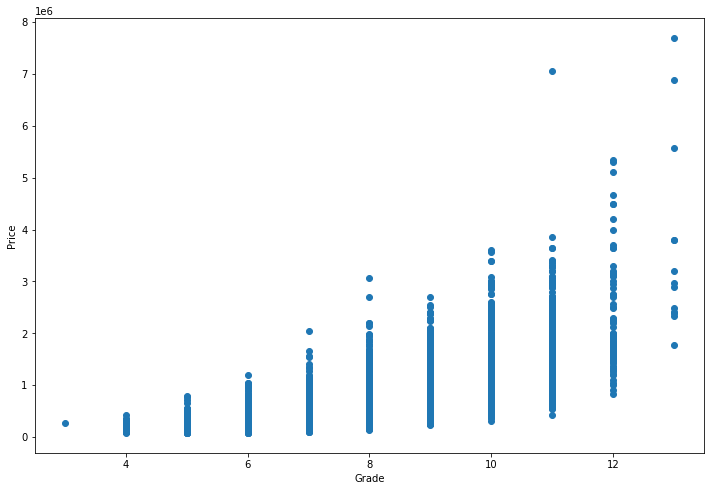

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x='grade', y='price', data=housesale_df)

plt.xlabel('Grade')
plt.ylabel('Price')

plt.show()

In [82]:
housesale_corr = housesale_df.corr()

housesale_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.306692,0.022036,0.585241,0.082845,-0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,-0.009951,0.132054,0.393406,0.030690,-0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.024280,0.224903,0.569884,0.088303,-0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.052155,0.241214,0.756402,0.184342,-0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,-0.085514,0.230227,0.144763,0.718204,-0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.049239,0.125943,0.280102,-0.010722,-0.489193
waterfront,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.014306,-0.041904,0.086507,0.030781,0.026153
view,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,0.005871,-0.078107,0.280681,0.072904,0.053636
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.015102,-0.105877,-0.093072,-0.003126,0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.113575,0.200341,0.713867,0.120981,-0.447865


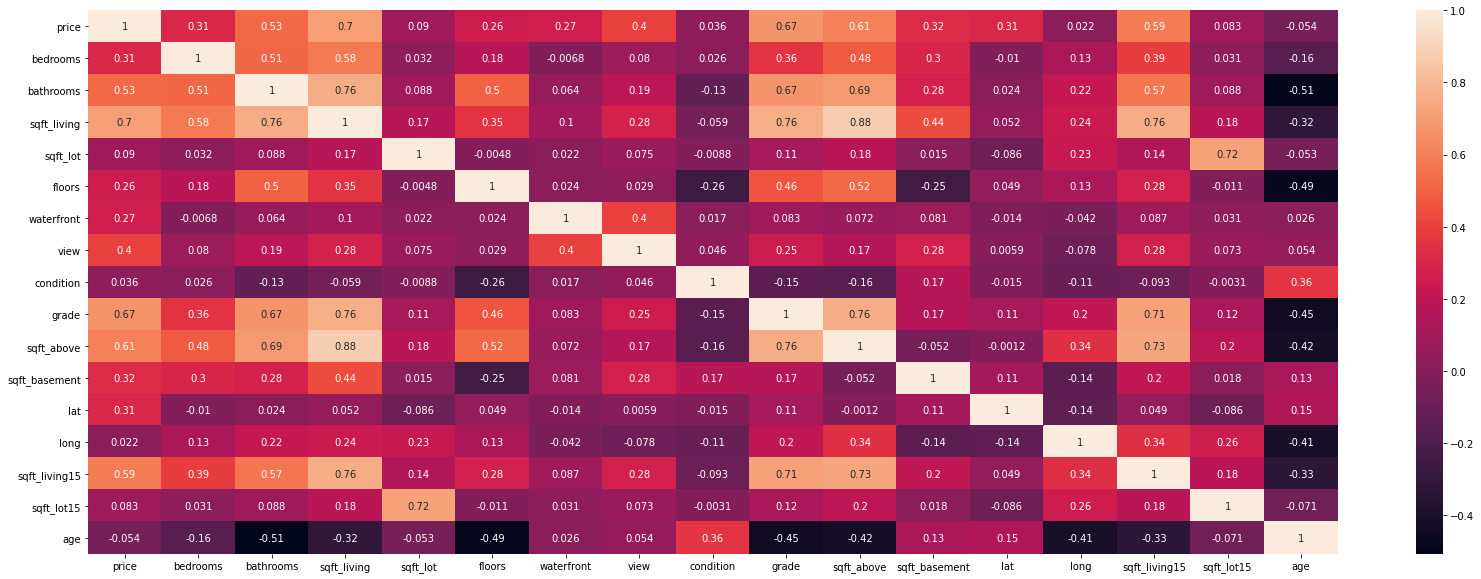

In [87]:
plt.figure(figsize=(28,10))
sns.heatmap(housesale_corr, annot=True)
plt.show()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = housesale_df.drop('price', axis=1)
y = housesale_df['price']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
X_train.shape, y_train.shape

((17277, 17), (17277,))

In [92]:
X_test.shape, y_test.shape

((4320, 17), (4320,))

## Perfoming Kitchen Sink Regression using ML and Non-ML Techniques

### ML Model from the scikit-learn library

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg_model = LinearRegression().fit(X_train, y_train)

In [95]:
print('Training score: ', reg_model.score(X_train, y_train))

Training score:  0.6914306508420043


In [97]:
predictors = X_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()
print(coef)

long            -114282.160073
bedrooms         -32133.626310
sqft_lot15           -0.490559
sqft_lot              0.191728
sqft_living15        25.549898
sqft_basement        35.528515
sqft_above           70.880548
sqft_living         106.409063
floors              445.699009
age                2426.533922
condition         31141.615230
renovated         42922.350137
bathrooms         44271.750276
view              51353.211936
grade             96193.334009
waterfront       566205.094947
lat              567789.161062
dtype: float64


In [101]:
y_pred = reg_model.predict(X_test)

In [102]:
from sklearn.metrics import r2_score

In [103]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.710689085976103


### Non-ML model using statsmodels.api

In [111]:
import statsmodels.api as sm

In [105]:
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const)

In [106]:
result = model.fit()

In [107]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2417.
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        20:02:53   Log-Likelihood:            -2.3553e+05
No. Observations:               17277   AIC:                         4.711e+05
Df Residuals:                   17260   BIC:                         4.712e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.18e+07   1.71e+06    -24.440

## Using Univariate Linear Regression Tests to Select Features

In [110]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

import statsmodels as sm

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [112]:
housesale_df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
age                 int64
renovated        category
dtype: object

In [124]:
housesale_columns = [
                     'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                     'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'renovated'
                     ]

In [127]:
for col in housesale_columns:
  housesale_df[col] = pd.to_numeric(housesale_df[col], downcast="float")

In [128]:
housesale_df.dtypes

price            float32
bedrooms         float32
bathrooms        float32
sqft_living      float32
sqft_lot         float32
floors           float32
waterfront       float32
view             float32
condition        float32
grade            float32
sqft_above       float32
sqft_basement    float32
lat              float32
long             float32
sqft_living15    float32
sqft_lot15       float32
age              float32
renovated        float32
dtype: object

In [129]:
housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,47.511200,-122.257004,1340.0,5650.0,66.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,47.721001,-122.319000,1690.0,7639.0,70.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,47.737900,-122.233002,2720.0,8062.0,88.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,47.520802,-122.392998,1360.0,5000.0,56.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,47.616798,-122.044998,1800.0,7503.0,34.0,0.0


In [134]:
X = housesale_df[housesale_df.columns[1:]]
y = housesale_df['price']

In [135]:
X.shape, y.shape

((21597, 17), (21597,))

In [136]:
from sklearn.feature_selection import f_regression, SelectKBest

In [137]:
select_features = SelectKBest(f_regression, k= 3)

In [138]:
X_new = select_features.fit_transform(X, y)

In [144]:
X_new.shape

(21597, 3)

In [140]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2
0,1180.0,7.0,1180.0
1,2570.0,7.0,2170.0
2,770.0,6.0,770.0
3,1960.0,7.0,1050.0
4,1680.0,8.0,1680.0


In [150]:
selected_features = []

for i in range(len(X_new.columns)):
  for j in range(len(X.columns)):
    if (X_new.iloc[:,i].equals(X.iloc[:, j])):
      selected_features.append(X.columns[j])

selected_features

['sqft_living', 'grade', 'sqft_above']

In [153]:
rejected_features = set(list(X)) - set(selected_features)
print(rejected_features)

{'sqft_lot', 'waterfront', 'sqft_living15', 'bathrooms', 'floors', 'renovated', 'long', 'bedrooms', 'condition', 'sqft_basement', 'lat', 'sqft_lot15', 'view', 'age'}


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [155]:
X_train.shape, y_train.shape

((17277, 3), (17277,))

In [156]:
X_test.shape, y_test.shape

((4320, 3), (4320,))

In [157]:
model = sm.OLS(y_train, X_train)

In [158]:
result = model.fit()

In [159]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          3.010e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                        21:08:18   Log-Likelihood:                     -2.4006e+05
No. Observations:               17277   AIC:                                  4.801e+05
Df Residuals:                   17274   BIC:                                  4.801e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##Defining Helper Functions to Build and Train Multiple Models with Different Training Features

In [160]:
FEATURES = list(housesale_df.columns[1:18])

print(FEATURES)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'renovated']


In [189]:
def build_model(regression_fn,
                target,
                features,
                dataset,
                preprocess_fn,
                *hyperparameters):
  
  X = dataset[features]
  y = dataset[target]

  X = preprocess_fn(X, y, *hyperparameters)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  model = regression_fn(X_train, y_train)

  y_pred = model.predict(X_test)

  return {
      'X_train' : X_train,
      'X_test'  : X_test,
      'y_train' : y_train,
      'y_test'  : y_test,
      'y_pred'  : y_pred,
      'model'   : model
  }

In [197]:
def compare_results(result_dict):

  for key in result_dict:
    print('Test: ', key)
    print('R-Squared', result_dict[key]['rsquared'])
    print('Adjusted R-Squared', result_dict[key]['adj_rsquared'])

  n_components = list(range(1, 18))
  reg_score = [result_dict[key]['adj_rsquared'] for key in result_dict]

  plt.figure(figsize=(12, 10))
  plt.plot(n_components, reg_score)

  pylab.ylim([0, 1])

  plt.xlabel('N Components')
  plt.ylabel('Adjusted R-Squared')

  plt.show()

In [198]:
def get_model_scores(model_params):
  result_dict = {}

  for key in model_params:
    result_dict[key] = {
        'rsquared': model_params[key]['model'].rsquared,
        'adj_rsquared': model_params[key]['model'].rsquared_adj
    }

  compare_results(result_dict)

In [199]:
def ols_reg(X_train, y_train):
  
  ols = sm.OLS(y_train, X_train)

  model = ols.fit()

  return model

##Finding the Best Value of K

In [200]:
from sklearn.feature_selection import f_regression, SelectKBest

In [201]:
def apply_f_regression(X, y, k, add_constant = False):

  select_features = SelectKBest(f_regression, k=k)
  X_new = select_features.fit_transform(X, y)

  if add_constant is True:
    X_new = sm.add_constant(X_new)

  return pd.DataFrame(X_new)

In [202]:
model_params = {}

for i in range(1, 18):
  model_params['f_regression - k: ' + str(i)] = build_model(ols_reg,
                                                            'price',
                                                            FEATURES,
                                                            housesale_df,
                                                            apply_f_regression,
                                                            i,
                                                            True)

Test:  f_regression - k: 1
R-Squared 0.4954494767794311
Adjusted R-Squared 0.49542026980268894
Test:  f_regression - k: 2
R-Squared 0.5329849076321238
Adjusted R-Squared 0.5329308361845879
Test:  f_regression - k: 3
R-Squared 0.5371347160530361
Adjusted R-Squared 0.5370543249309472
Test:  f_regression - k: 4
R-Squared 0.5433726062363415
Adjusted R-Squared 0.5432668564925334
Test:  f_regression - k: 5
R-Squared 0.5449915382649201
Adjusted R-Squared 0.5448598121165398
Test:  f_regression - k: 6
R-Squared 0.5740349246650324
Adjusted R-Squared 0.5738869344825188
Test:  f_regression - k: 7
R-Squared 0.5735658820164449
Adjusted R-Squared 0.5734177288775971
Test:  f_regression - k: 8
R-Squared 0.5857650445994915
Adjusted R-Squared 0.5855971342000588
Test:  f_regression - k: 9
R-Squared 0.6429270286390609
Adjusted R-Squared 0.6427616021987732
Test:  f_regression - k: 10
R-Squared 0.6603311790533862
Adjusted R-Squared 0.6601541350162912
Test:  f_regression - k: 11
R-Squared 0.6609254179020807
A

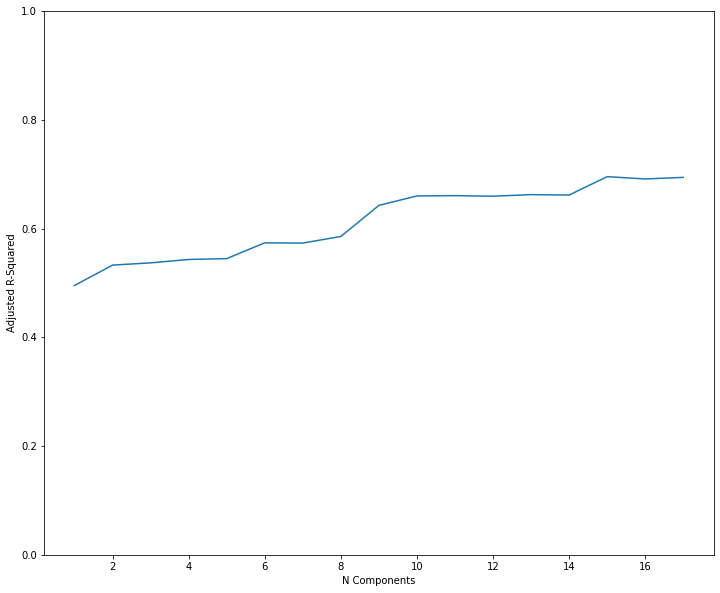

In [203]:
get_model_scores(model_params)

In [204]:
def linear_reg(X_train, y_train):

  model = LinearRegression().fit(X_train, y_train)

  return model

In [211]:
sklearn_model = {}

sklearn_model['f_regression'] = build_model(linear_reg,
                                            'price',
                                            FEATURES,
                                            housesale_df,
                                            apply_f_regression,
                                            9)

In [212]:
model = sklearn_model['f_regression']['model']
X_train = sklearn_model['f_regression']['X_train']
X_test = sklearn_model['f_regression']['X_test']
y_train = sklearn_model['f_regression']['y_train']
y_test = sklearn_model['f_regression']['y_test']
y_pred = sklearn_model['f_regression']['y_pred']

In [213]:
print('Training score: ', model.score(X_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.6427606829777956
Testing score:  0.6282333610176921
